# CREDIT CARD FRAUD DETECTION SYSTEM



# **Introduction**:
Credit card fraud is a growing threat to financial institutions and consumers, with billions lost annually due to unauthorized transactions. As digital transactions increase, fraudsters are using sophisticated techniques that make early detection critical. This project focuses on using machine learning algorithms to detect fraudulent credit card transactions efficiently, helping prevent losses and ensure secure transactions.

# **Goal of the project**:
The main goal of this project is to build a predictive model that can accurately distinguish between fraudulent and legitimate transactions using historical data.



# **Data Story:**
   The dataset contains transactions made by European cardholders using credit cards in September 2013. It includes transactions from a two-day period, with 492 fraudulent transactions out of a total of 284,807. The dataset is highly imbalanced.

Due to confidentiality concerns, the original features and additional background information about the data are not provided.


**Features**:


*   V1, V2, ... V28 are the principal components obtained with PCA


*   The only features which have not been transformed with PCA are time and amount

 The "Time" feature represents the number of seconds that have passed since the first transaction in the dataset.

 the "Amount" column represents the monetary value of each transaction. It indicates how much money was involved in the transaction and is measured in the respective currency (e.g., euros for European transactions).


 **Target**: Class is the response variable, which takes the values 1 (fraudulent transaction) and 0 (normal transaction).














   

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score
import joblib

In [2]:
#loading the dataset to a pandas DataFrame
df=pd.read_csv('/content/creditcard.csv')

In [3]:
# first five rows of the dataset.
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [4]:
# to get information of overview of the dataset.
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,156612.000000,156612.000000,156611.000000,156611.000000,156611.000000,156611.000000,156611.000000,156611.000000,156611.000000,156611.000000,...,156611.000000,156611.000000,156611.000000,156611.000000,156611.000000,156611.000000,156611.000000,156611.000000,156611.000000,156611.000000
mean,56114.721286,-0.226386,0.048394,0.593043,0.138981,-0.226417,0.070158,-0.102414,0.046492,0.000103,...,-0.037754,-0.107719,-0.027034,0.009327,0.110154,0.019957,0.001358,0.002436,88.193486,0.002235
std,23396.766143,1.845422,1.623688,1.342725,1.359583,1.333430,1.291758,1.215751,1.247100,1.153654,...,0.748501,0.650177,0.589119,0.596356,0.453140,0.492833,0.394077,0.311975,246.283133,0.047221
min,0.000000,-56.407510,-72.715728,-33.680984,-5.519697,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,39715.750000,-1.015986,-0.535158,0.078524,-0.719040,-0.865289,-0.675734,-0.598388,-0.147495,-0.674379,...,-0.231035,-0.551261,-0.171222,-0.329197,-0.166798,-0.327064,-0.063970,-0.012232,5.850000,0.000000
50%,57468.500000,-0.252679,0.121513,0.696591,0.153742,-0.270190,-0.187679,-0.048747,0.069685,-0.099691,...,-0.060559,-0.084204,-0.040998,0.062540,0.151404,-0.056238,0.010348,0.022534,22.060000,0.000000
75%,74684.000000,1.167918,0.808926,1.335921,0.971445,0.307798,0.458524,0.439542,0.364539,0.616347,...,0.114578,0.324146,0.091124,0.411265,0.410003,0.286548,0.089525,0.078085,78.000000,0.000000
max,108499.000000,2.439207,22.057729,9.382558,16.875344,34.801666,22.529298,36.677268,20.007208,15.594995,...,27.202839,10.503090,19.002942,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156612 entries, 0 to 156611
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    156612 non-null  float64
 1   V1      156612 non-null  float64
 2   V2      156611 non-null  float64
 3   V3      156611 non-null  float64
 4   V4      156611 non-null  float64
 5   V5      156611 non-null  float64
 6   V6      156611 non-null  float64
 7   V7      156611 non-null  float64
 8   V8      156611 non-null  float64
 9   V9      156611 non-null  float64
 10  V10     156611 non-null  float64
 11  V11     156611 non-null  float64
 12  V12     156611 non-null  float64
 13  V13     156611 non-null  float64
 14  V14     156611 non-null  float64
 15  V15     156611 non-null  float64
 16  V16     156611 non-null  float64
 17  V17     156611 non-null  float64
 18  V18     156611 non-null  float64
 19  V19     156611 non-null  float64
 20  V20     156611 non-null  float64
 21  V21     15

In [6]:
# to check if the dataset have any null values
df.isnull().sum()

,0
Time,0
V1,0
V2,1
V3,1
V4,1
V5,1
V6,1
V7,1
V8,1
V9,1


There are no null values in the credit card dataset.

In [7]:
# to check the precense of duplicants
df.duplicated().sum()

598

In [8]:
#removing the duplicants
df=df.drop_duplicates()

In [9]:
df.duplicated().sum()

0

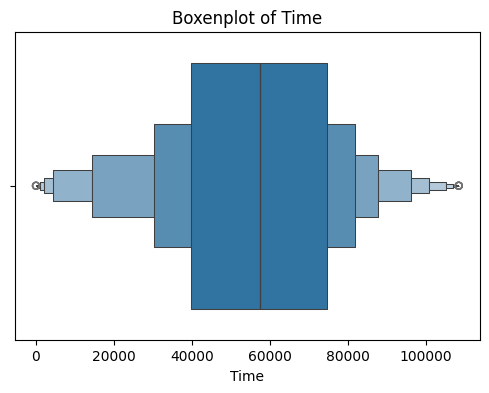

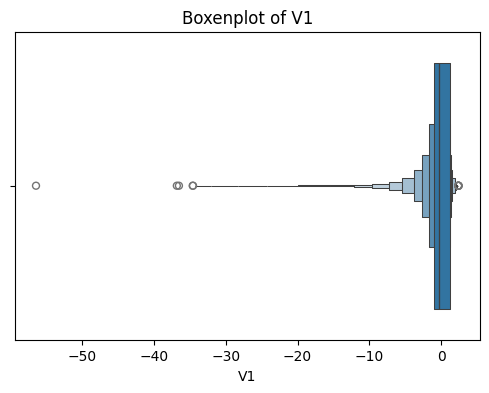

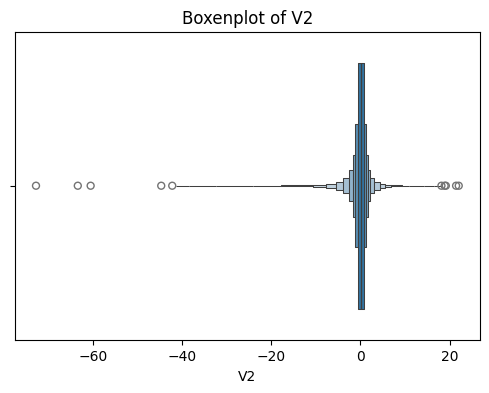

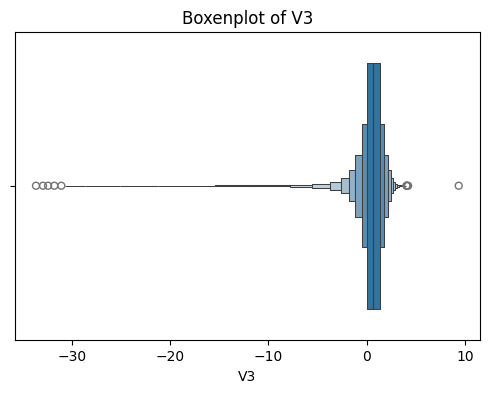

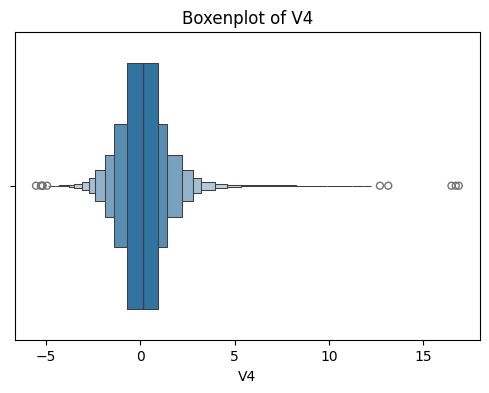

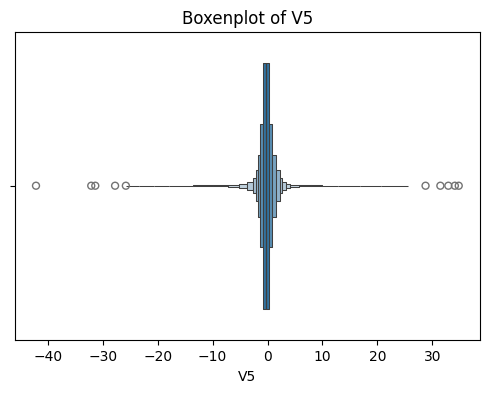

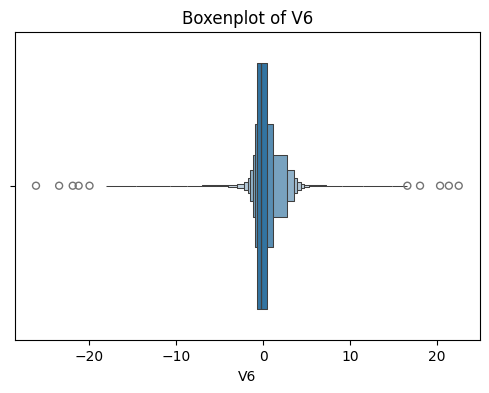

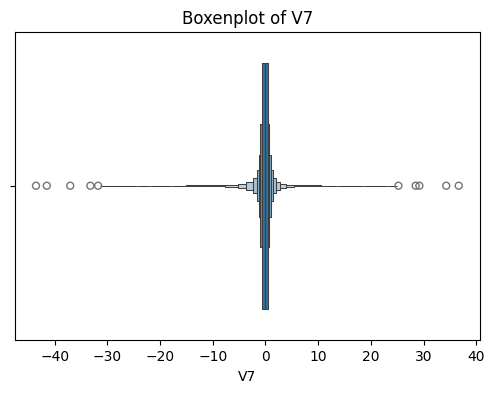

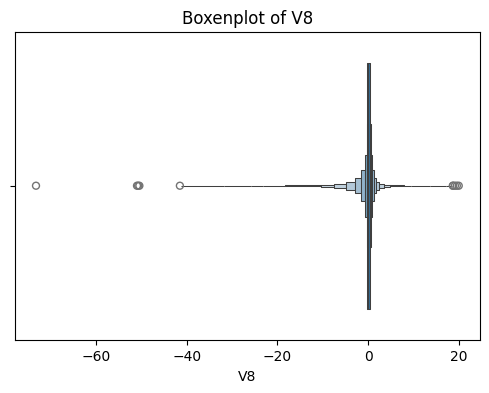

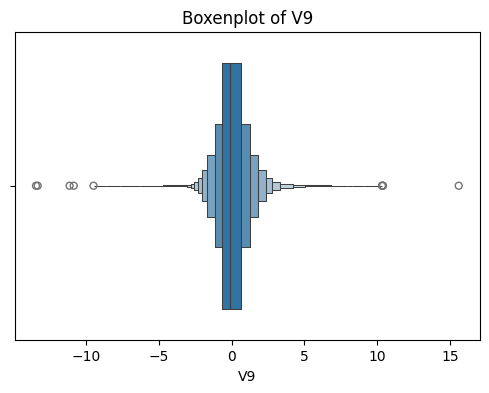

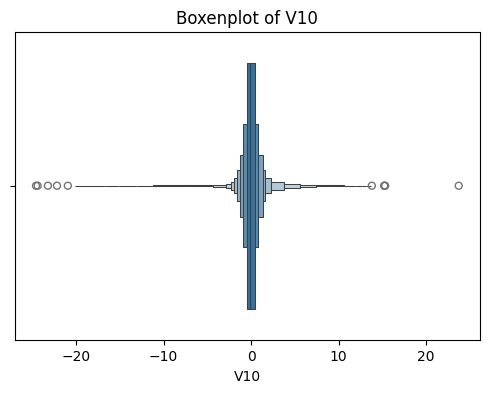

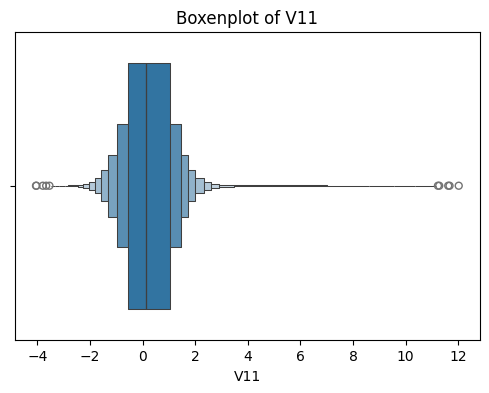

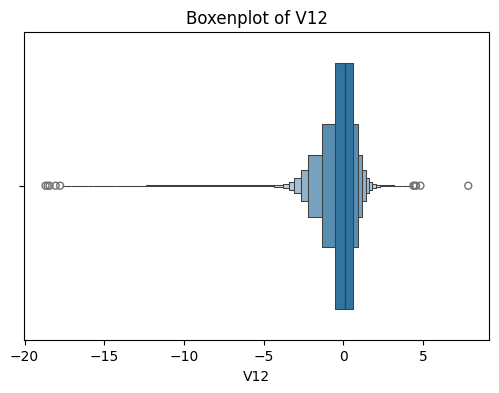

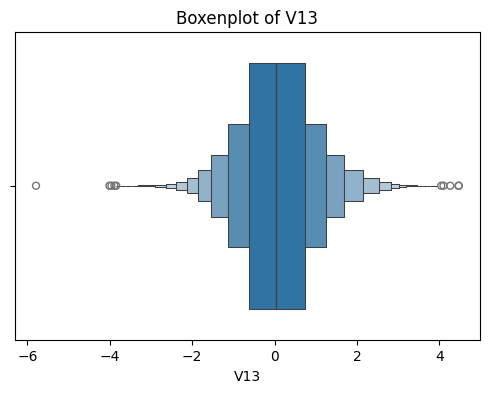

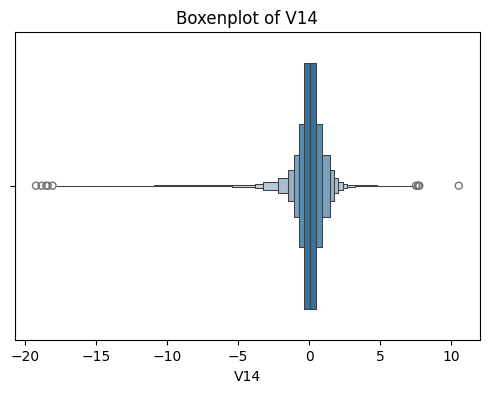

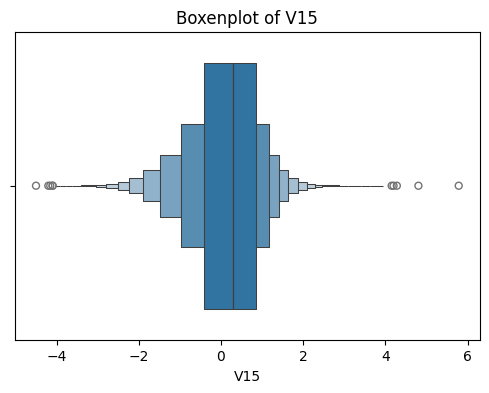

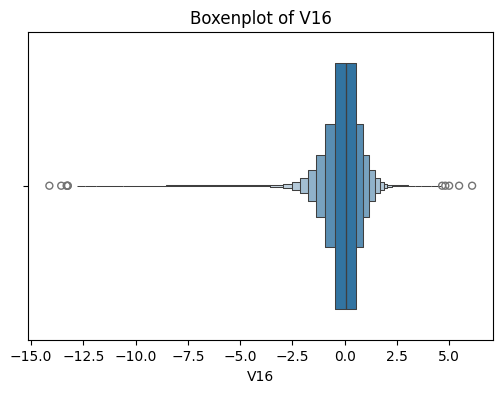

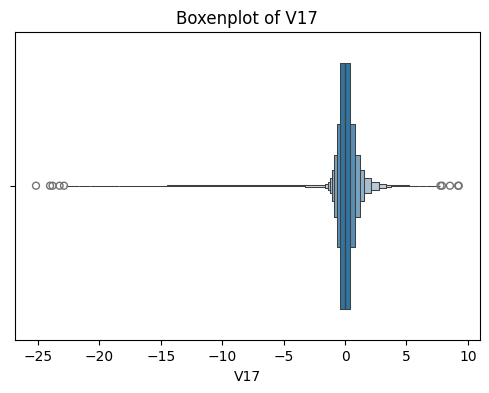

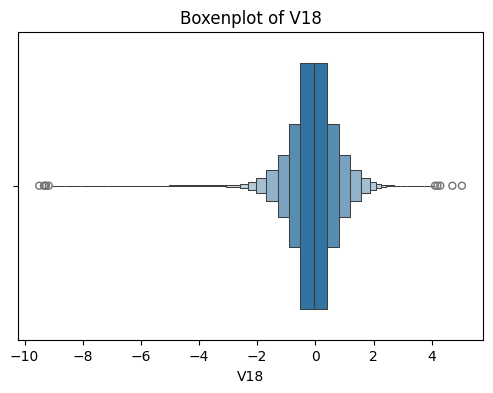

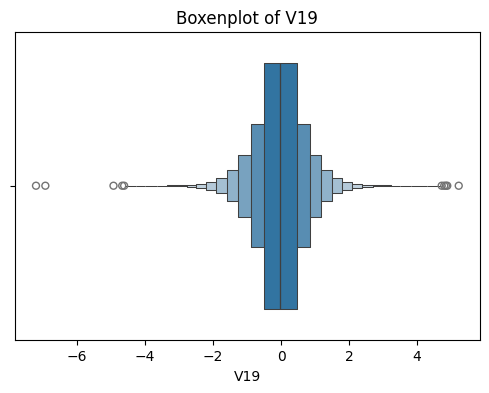

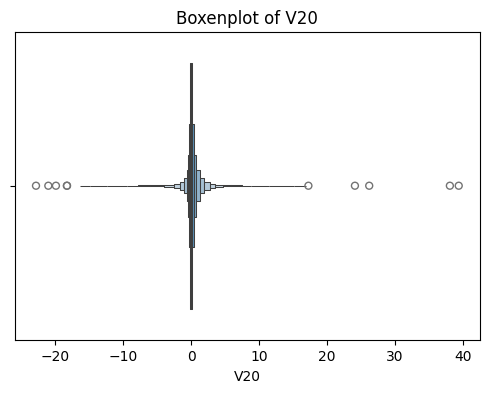

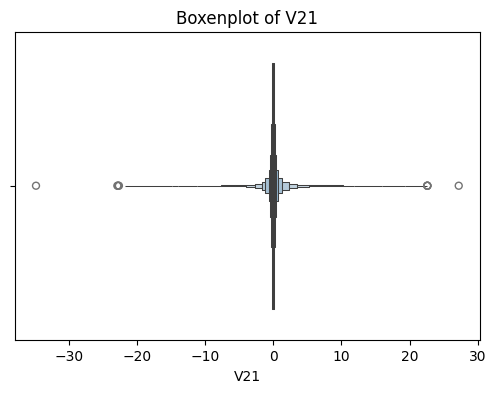

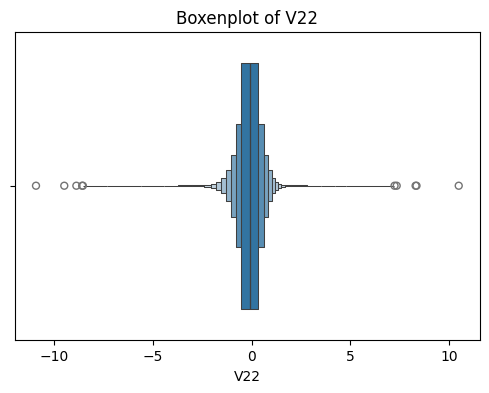

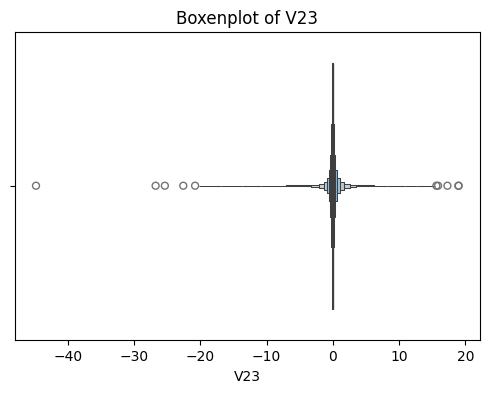

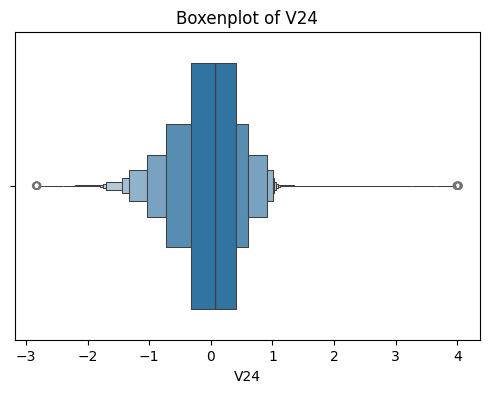

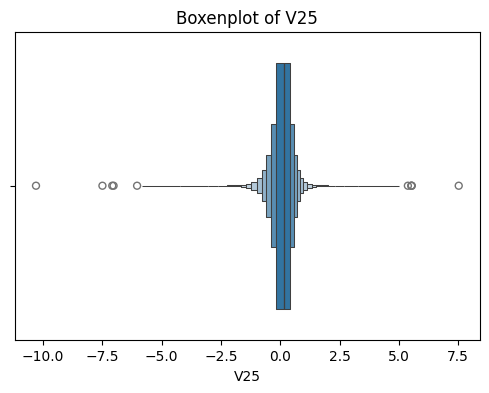

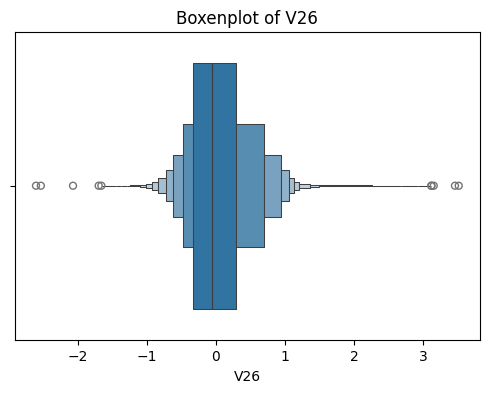

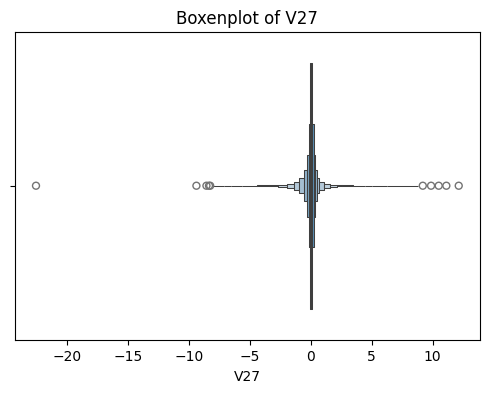

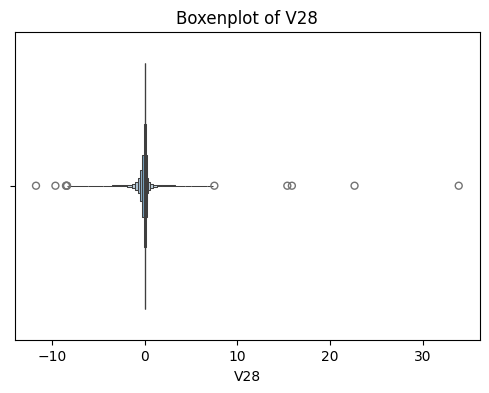

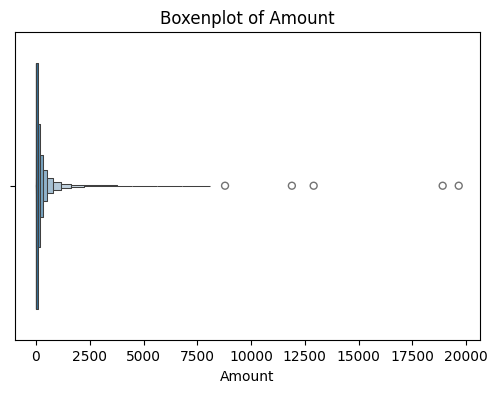

In [10]:
# boxplot of features
df_features=df.drop('Class',axis=1)
for i in df_features.columns:
  plt.figure(figsize=(6,4))
  sns.boxenplot(x=df[i])
  plt.title(f'Boxenplot of {i}')
  plt.show()

"The boxplot graph of feature columns highlights the presence of outliers, which could potentially affect the performance of our model."

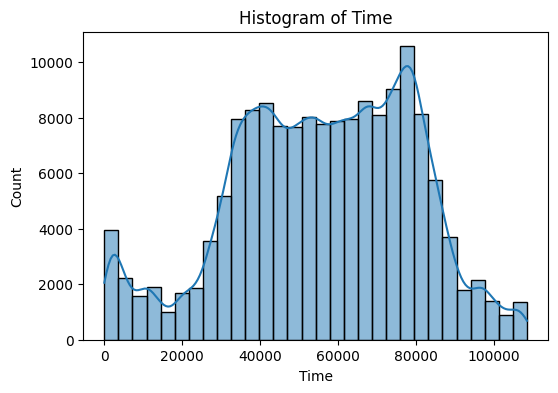

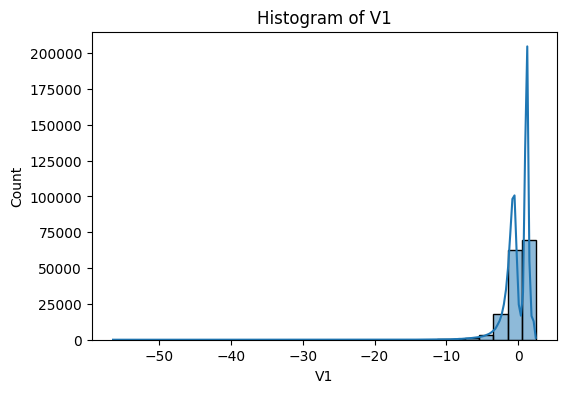

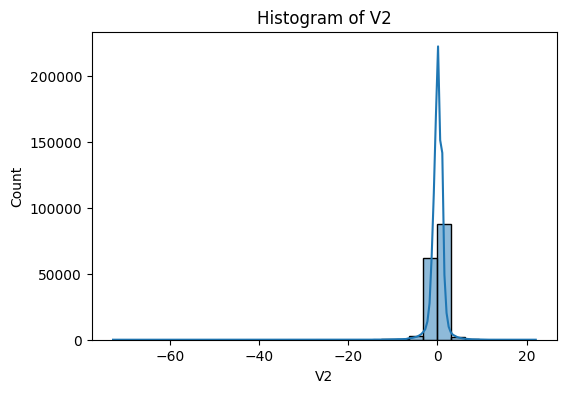

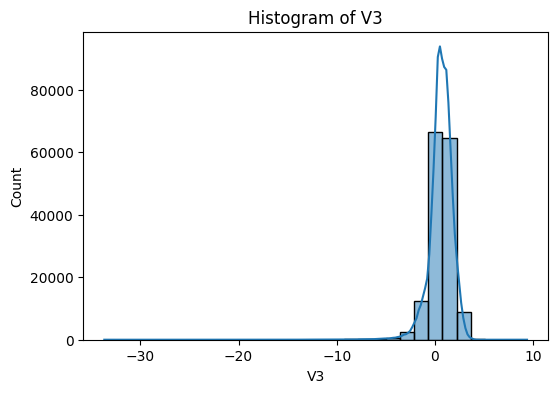

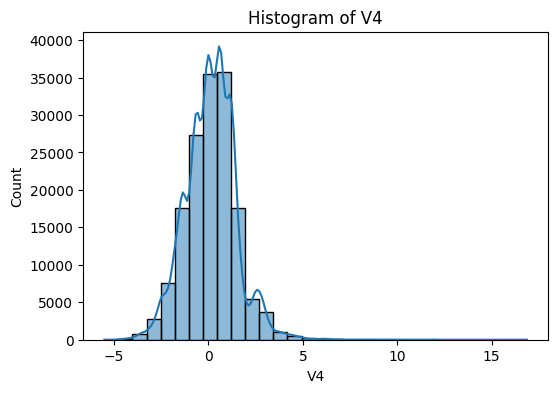

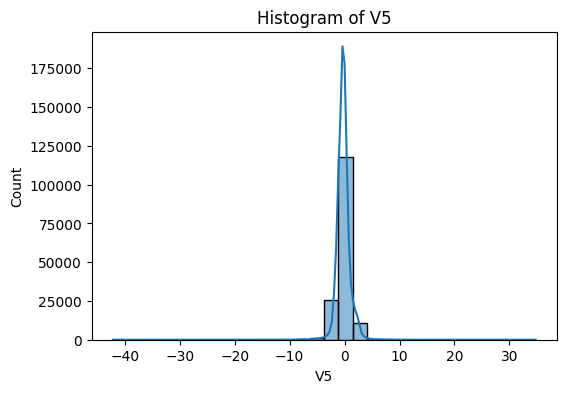

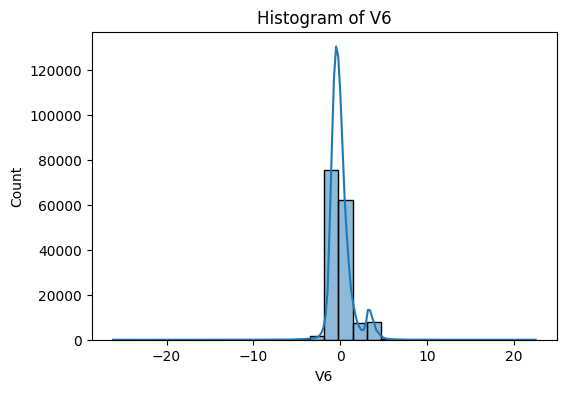

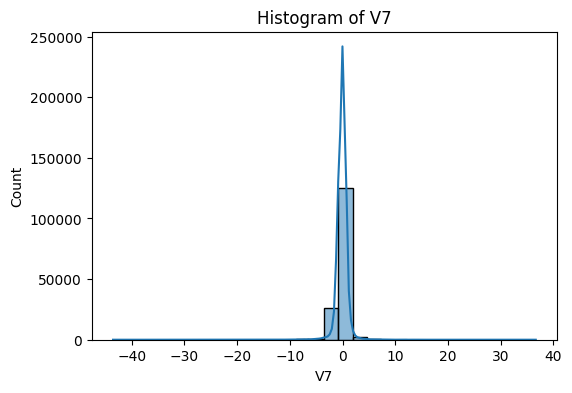

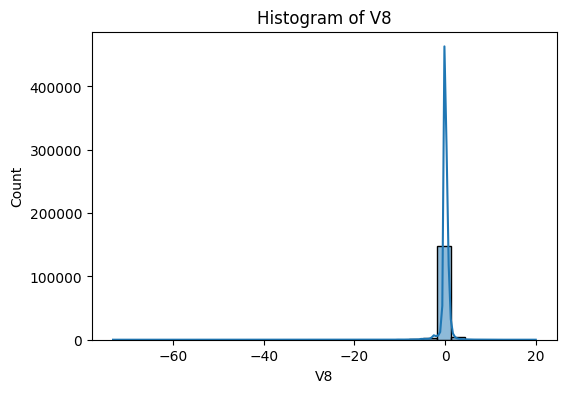

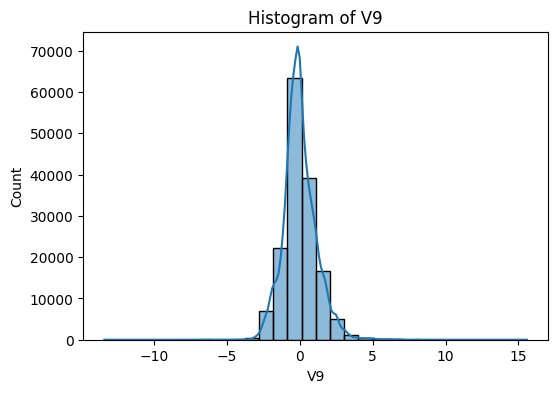

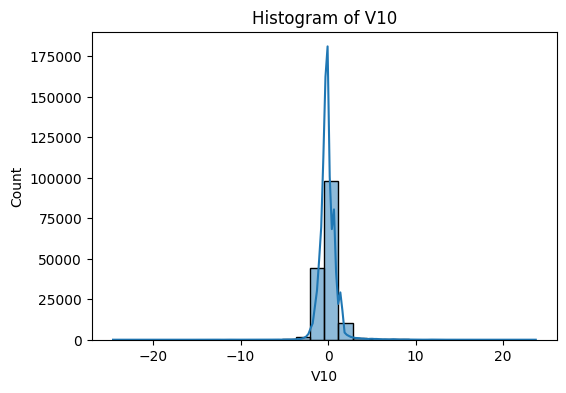

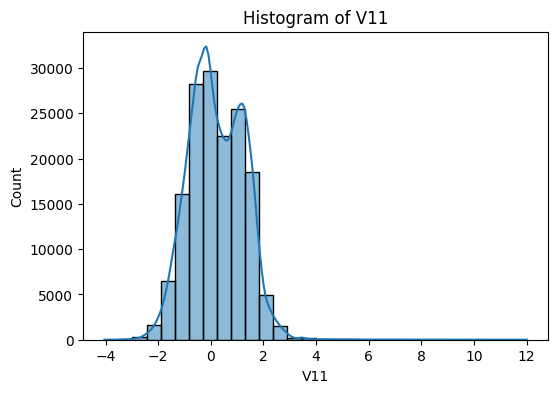

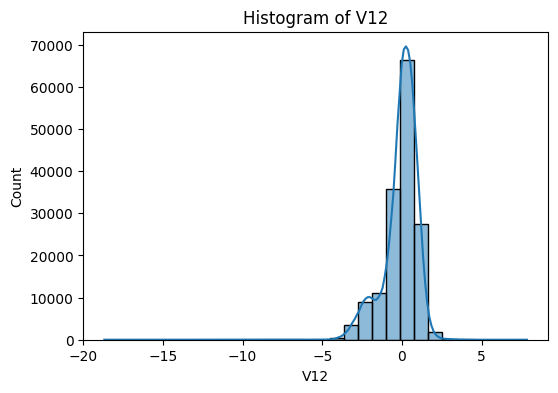

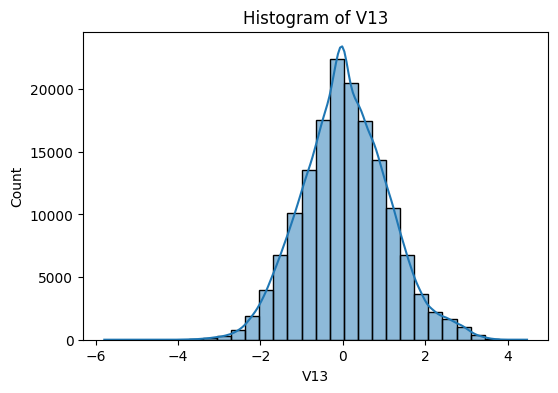

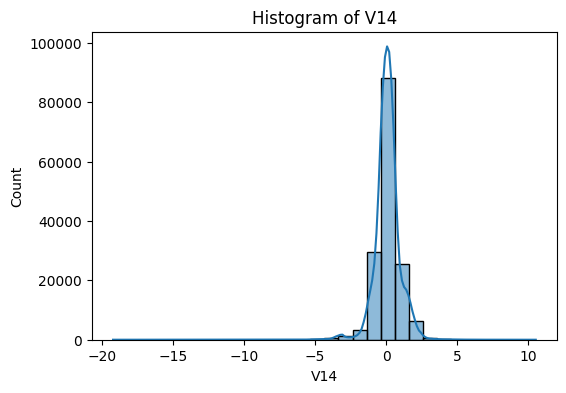

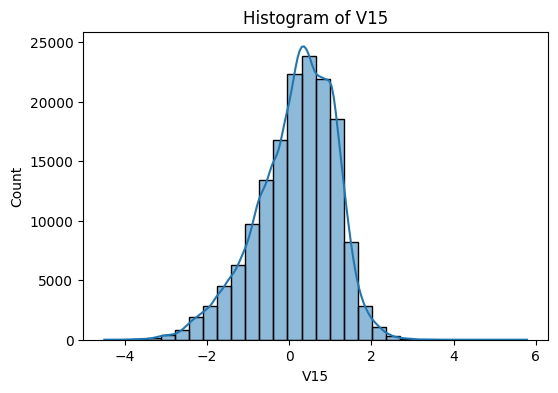

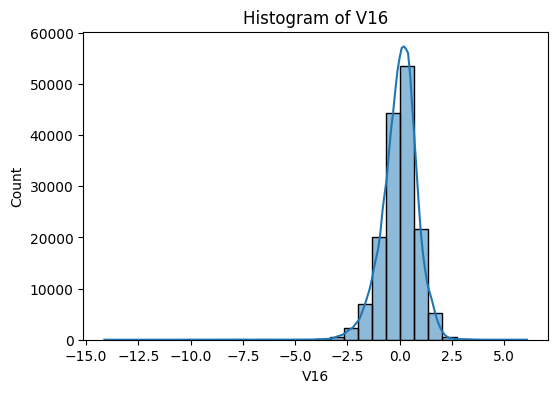

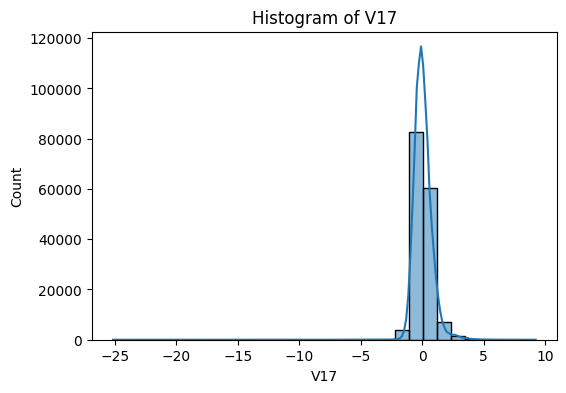

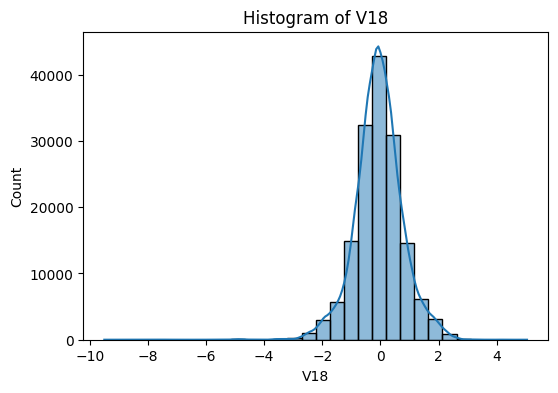

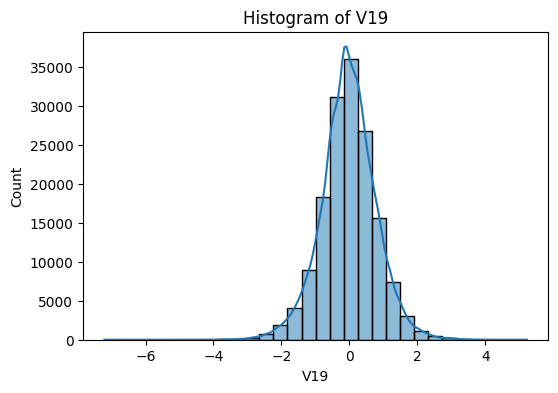

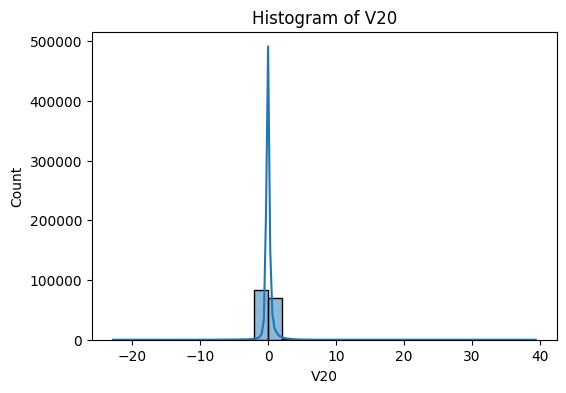

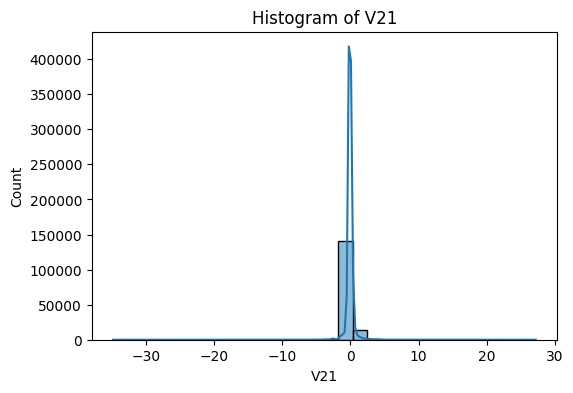

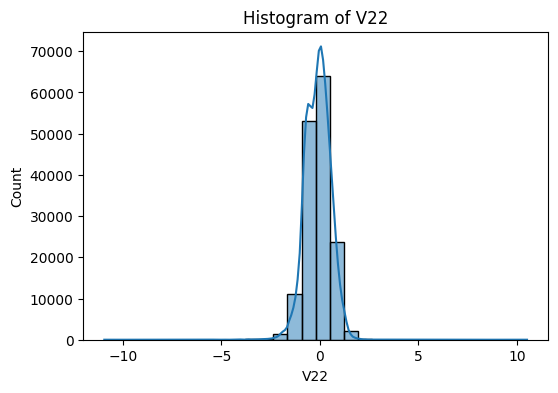

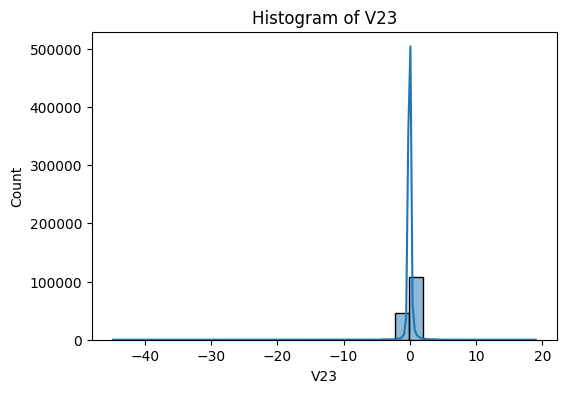

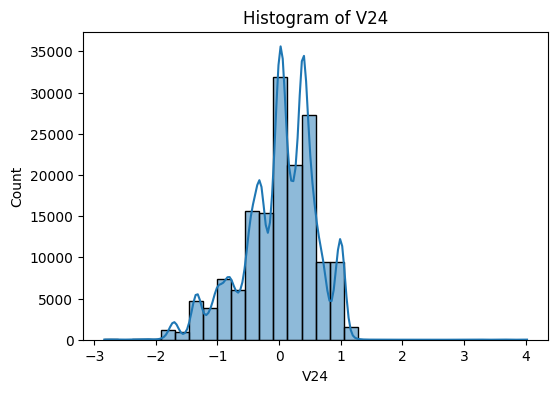

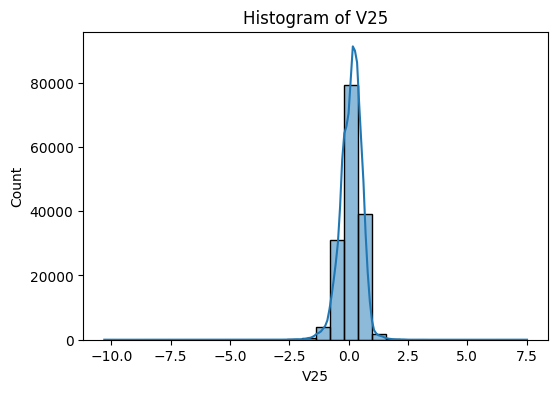

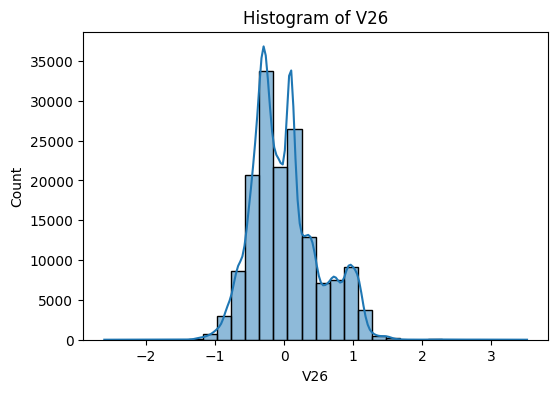

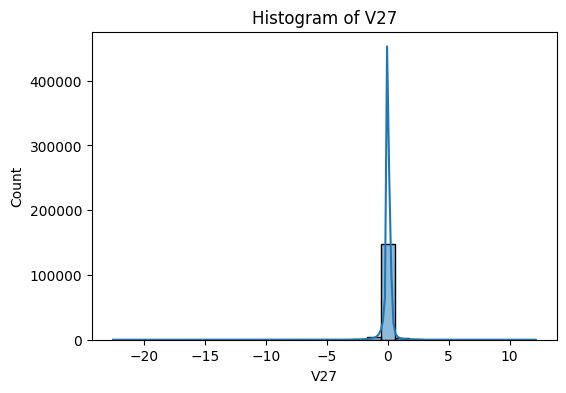

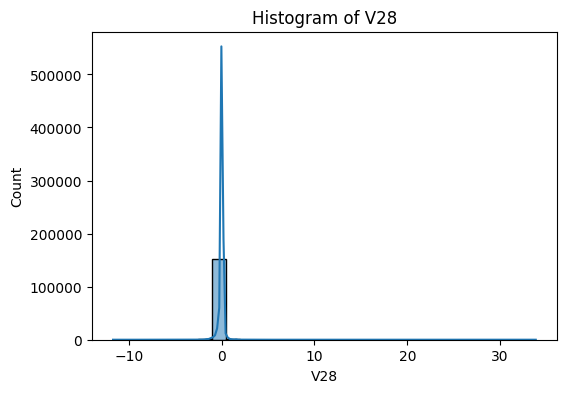

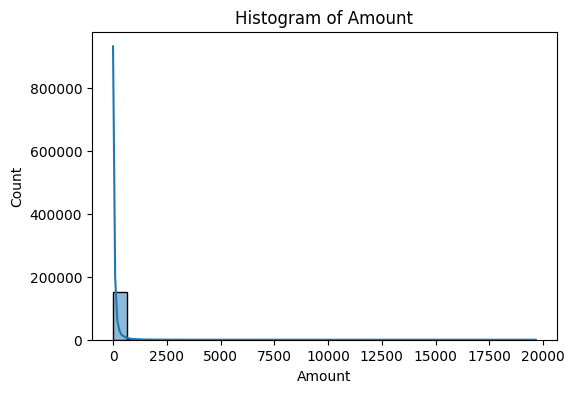

In [11]:
for i in df_features.columns:
  plt.figure(figsize=(6,4))
  sns.histplot(df[i],kde=True,bins=30)
  plt.title(f'Histogram of {i}')
  plt.show()

**Features Correlation**

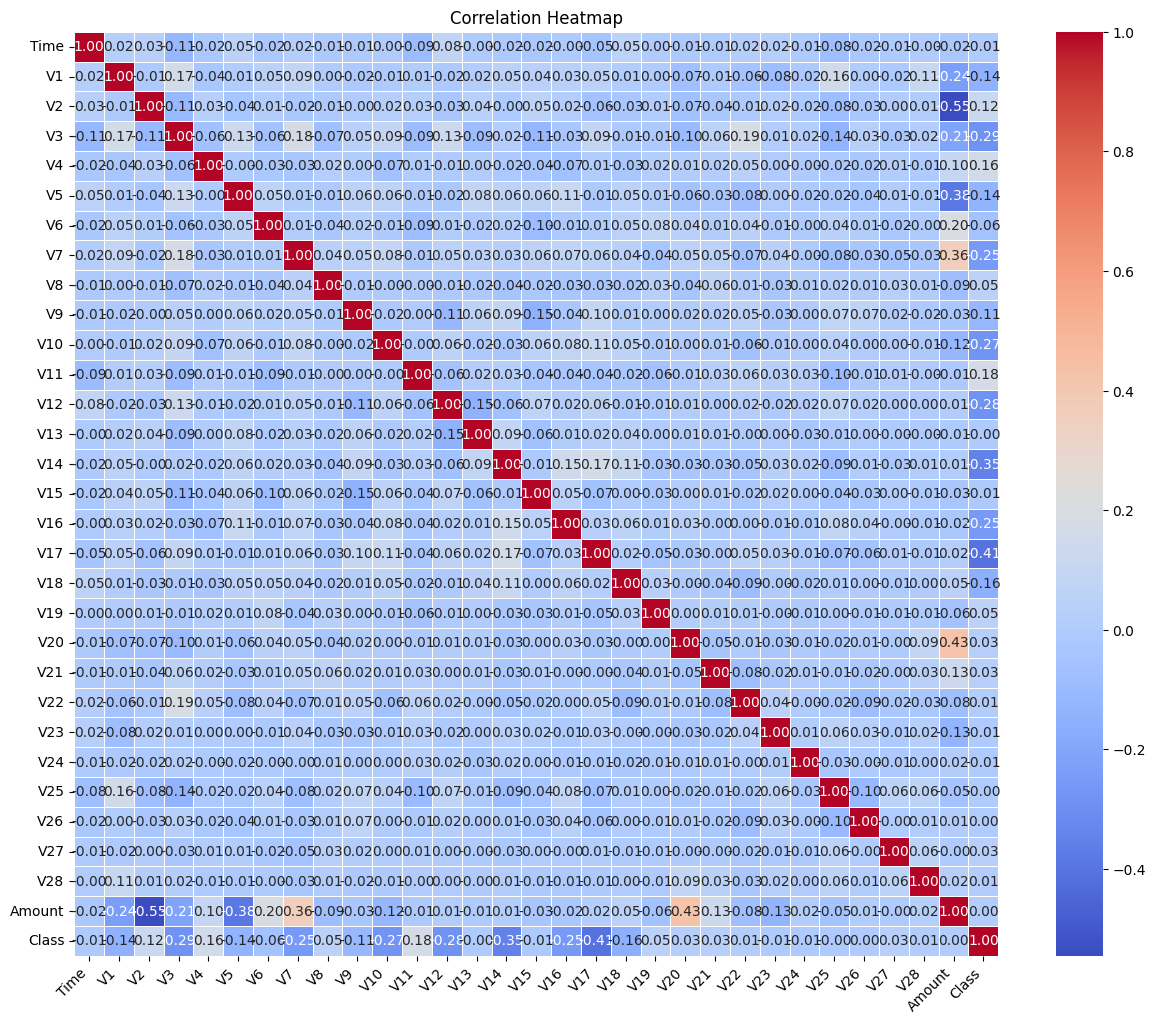

In [12]:
correlation_matrix = df.corr()
plt.figure(figsize=(15,12))
plt.title('Correlation Heatmap')
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True,linewidths=0.5   )
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.show()


there is no notable correlation between features V1-V28. There are certain correlations between some of these features and Time (inverse correlation with V3) and Amount (direct correlation with V7 and V20, inverse correlation with V1 and V5).



In [13]:
# using IQR (capping method) to handle the outliers

def outlier_capper(df):
    # Make a copy to avoid changing the original dataset
    df_capped = df.copy()

    for column in df_capped.columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile) for the column
        Q1 = df_capped[column].quantile(0.25)
        Q3 = df_capped[column].quantile(0.75)

        # Calculate the Interquartile Range (IQR)
        IQR = Q3 - Q1

        # Define lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap the values outside the bounds
        df_capped[column] = df_capped[column].apply(
            lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x
        )

    return df_capped

# Applying the function to your DataFrame
df_capped = outlier_capper(df_features)


# **Boxplot of features columns after handiling the outliers**

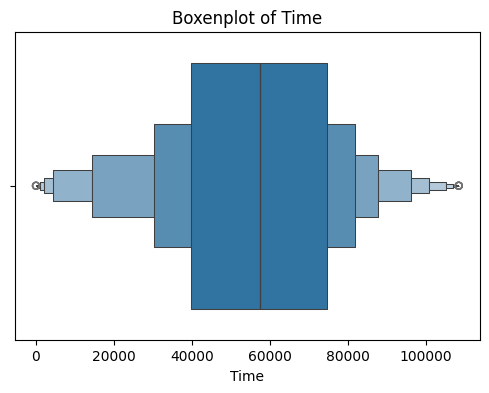

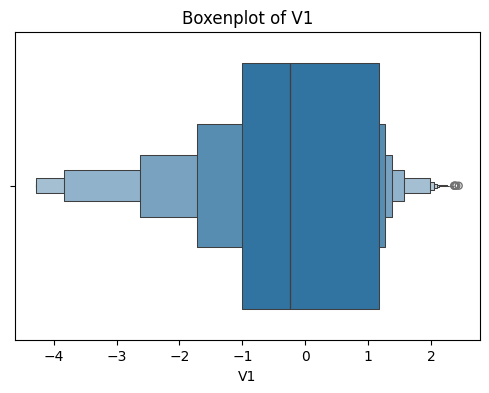

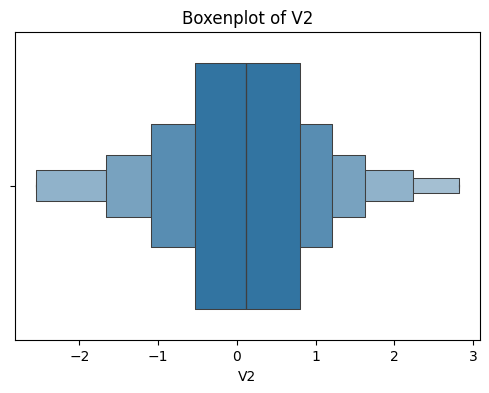

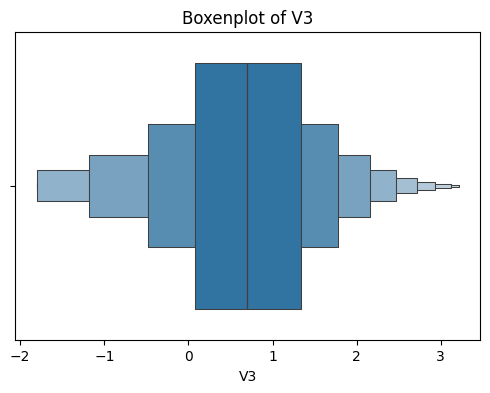

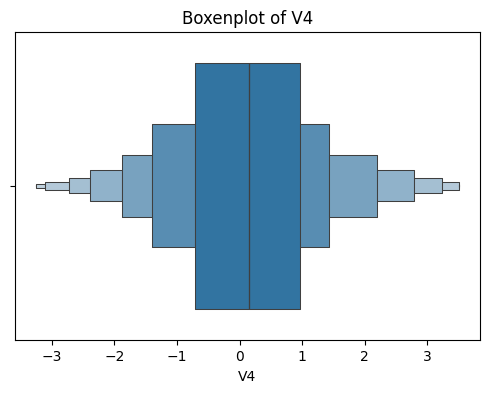

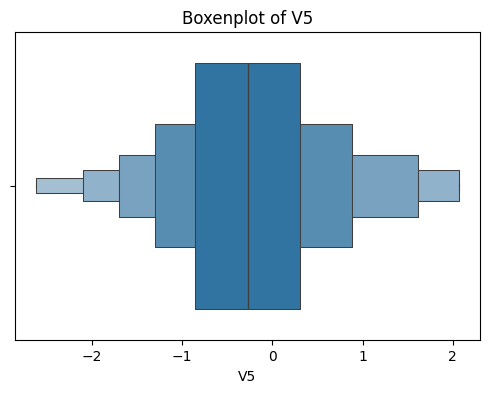

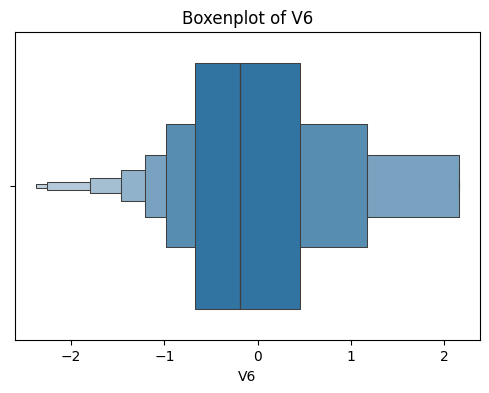

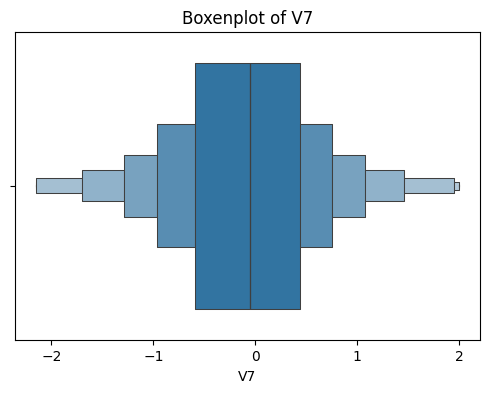

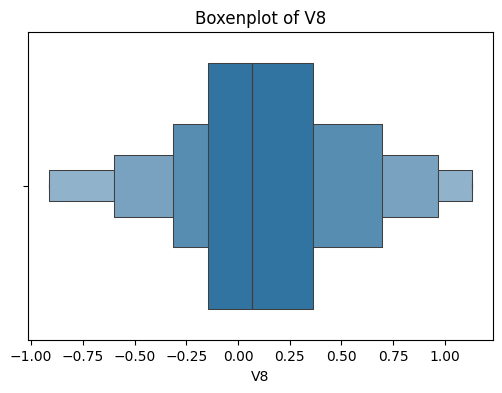

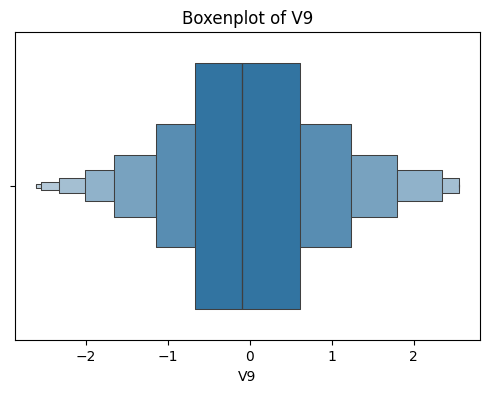

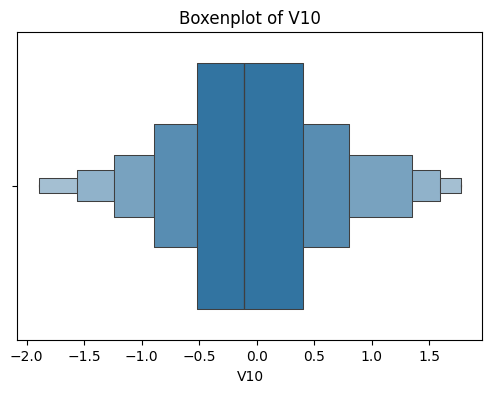

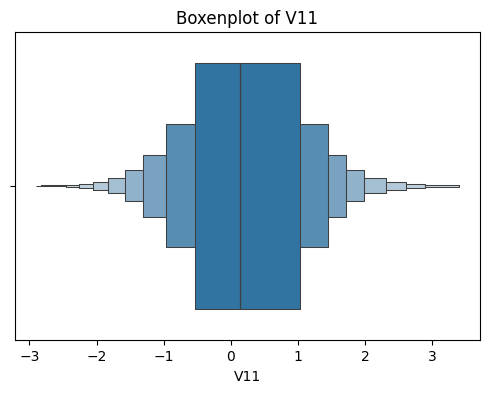

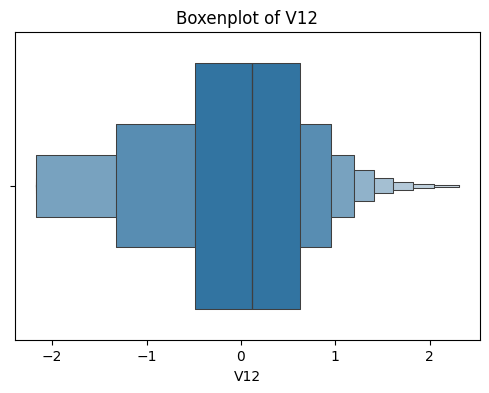

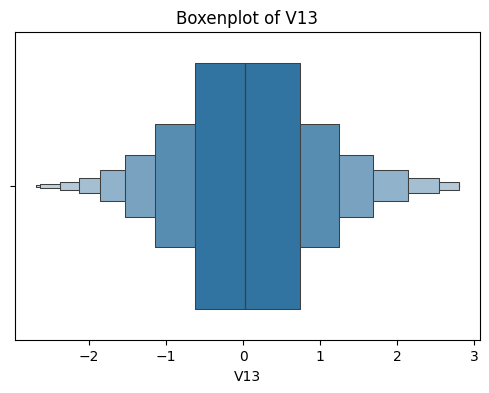

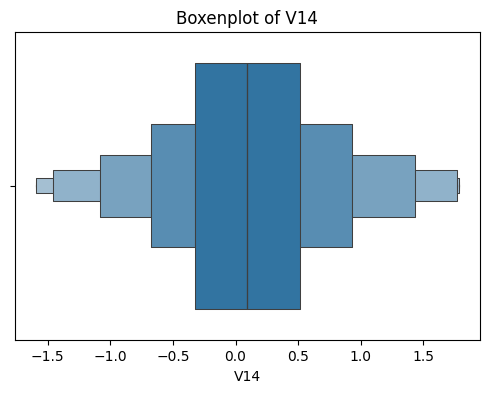

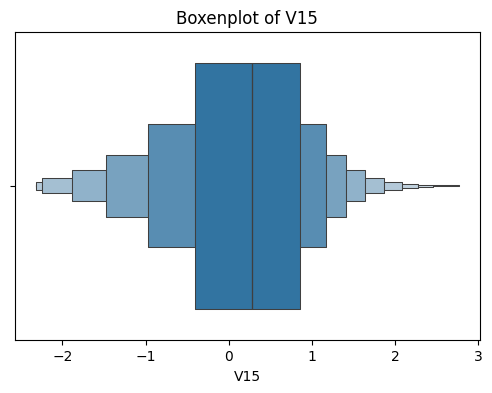

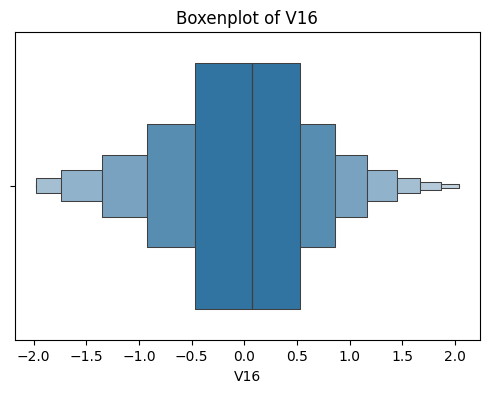

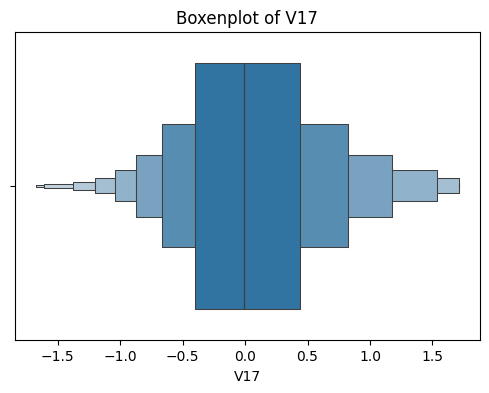

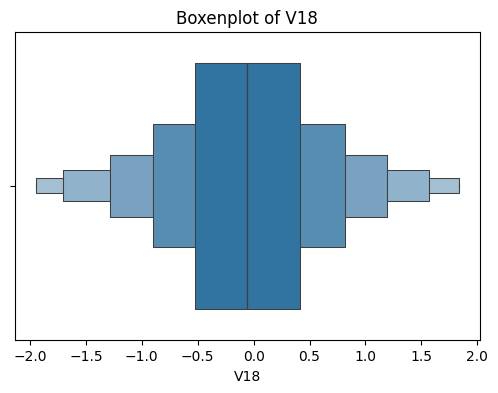

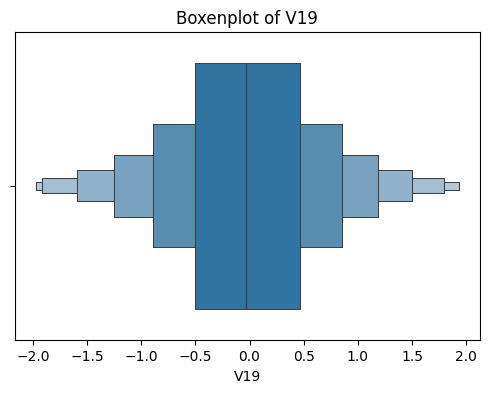

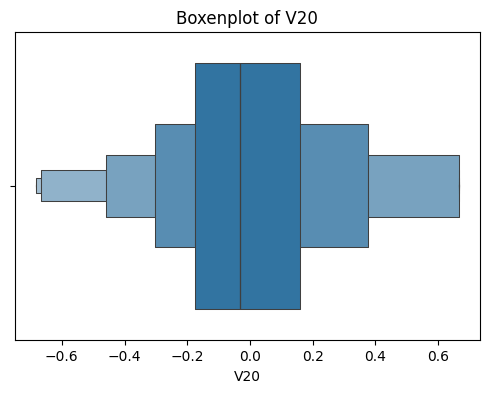

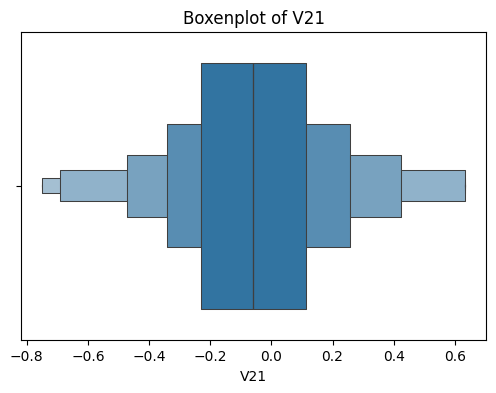

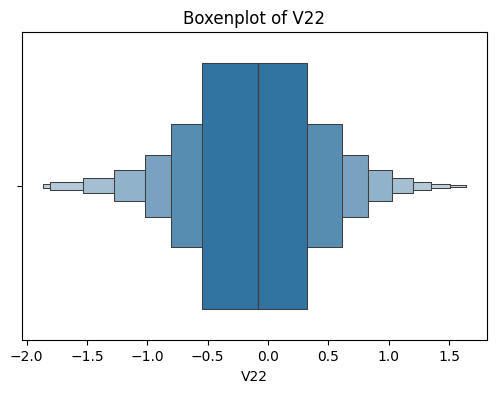

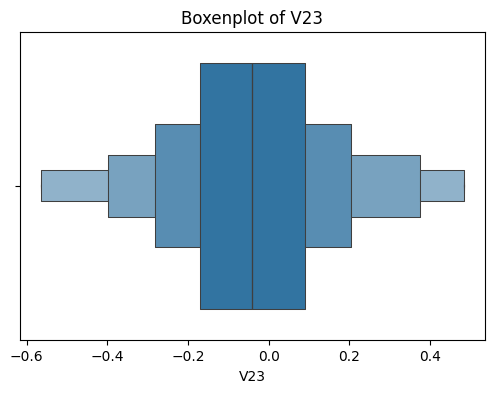

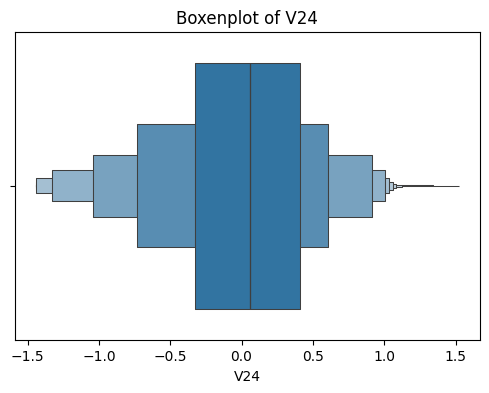

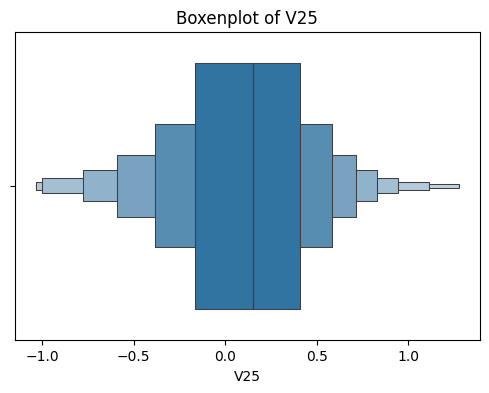

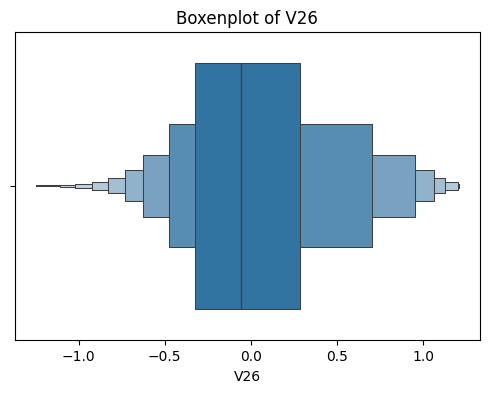

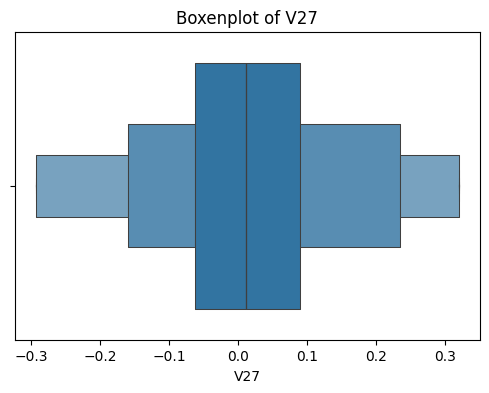

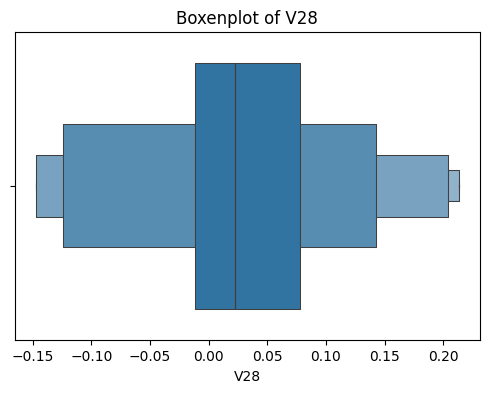

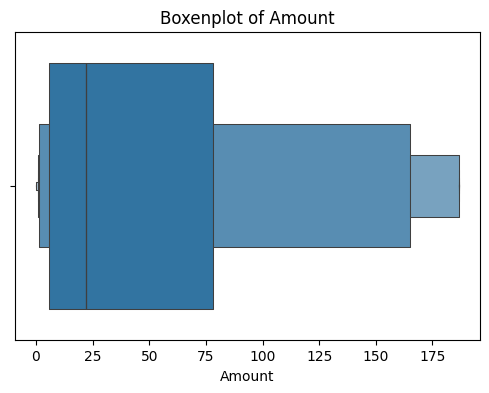

In [14]:
for i in df_capped.columns:
  plt.figure(figsize=(6,4))
  sns.boxenplot(x=df_capped[i])
  plt.title(f'Boxenplot of {i}')
  plt.show()

In [15]:
class_column= df['Class']
 # Re_index the 'class' coloumn to match the indices in 'df_capped'

class_column= class_column.loc[df_capped.index]

 # Combine 'df_capped' & 'class' column into a single DataFrame

df_combined= df_capped.copy()
df_combined['Class']=class_column

 # Display the combined DataFrame

df_combined


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.484515,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,186.625,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.213120,69.990,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156607,108494.0,1.936594,-0.120800,0.229271,0.757542,-1.082415,-1.309775,-0.519957,-0.238844,2.549986,...,-0.210772,-0.229685,0.475874,0.808513,-0.512590,-1.019885,0.033114,-0.024264,2.120,0.0
156608,108498.0,-0.524261,0.811210,2.295550,-0.303075,0.377562,0.183806,0.510108,-0.157593,1.150868,...,-0.264211,-0.314328,-0.345303,-0.418160,0.308547,-0.730573,-0.081765,-0.147132,11.270,0.0
156609,108498.0,1.841738,0.399834,0.463993,3.500766,-0.231414,0.292716,-0.544133,-0.023382,0.901591,...,0.040402,0.493054,0.179199,-0.015058,-0.238452,-0.016825,-0.007303,-0.033115,18.960,0.0
156610,108499.0,-2.028823,-1.532572,1.361941,-1.968798,0.880803,1.106584,0.241836,0.560031,1.693516,...,0.350387,0.495138,0.396035,-1.440514,0.467980,0.813026,-0.152260,0.047806,186.625,0.0


In [16]:
len(df_capped)

156014

In [17]:
df_combined['Class'].value_counts()

,count
Class,
0.0,155681
1.0,332


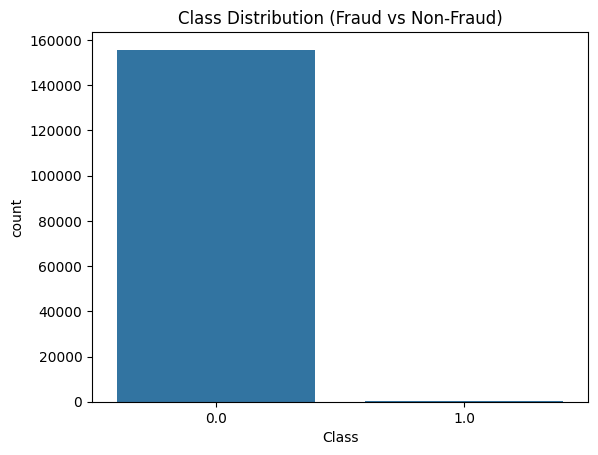

In [18]:
sns.countplot(x='Class',data=df_combined)
plt.title('Class Distribution (Fraud vs Non-Fraud)')
plt.show()


the number of normal transactions (class 0) is significantly greater than the number of fraudulent transactions (class 1). This highlights a highly imbalanced dataset, a common challenge in fraud detection tasks.

In [19]:
# seperating the data for analysis
normal=df_combined[df_combined.Class==0]
fraud=df_combined[df_combined.Class==1]

In [20]:
print(normal.shape)
print(fraud.shape)

(155681, 31)
(332, 31)


**Undersampling:**
   
   In the context of credit card fraud detection, the dataset is often highly imbalanced, with many more normal (non-fraudulent) transactions than fraudulent ones. We use the undersampling method we choose 473 random normal samples to create a balanced sample dataset for training our model.








In [21]:
normal_sample=normal.sample(n=473)

In [22]:
# concatenating the DataFrames
new_dataset=pd.concat([normal_sample,fraud],axis=0)

In [23]:
new_dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
29098,35318.0,0.728874,-1.404455,-1.805632,-0.467197,1.648494,2.155240,0.004056,0.579862,-1.480709,...,-0.527102,-1.865206,-0.183289,0.925265,0.424584,-0.683847,-0.042377,0.080812,186.625,0.0
11141,19276.0,1.283812,-0.413293,0.409720,-0.883823,-0.347107,0.478717,-0.811875,0.156270,2.549986,...,-0.229721,-0.185376,-0.167599,-1.386259,0.560561,-0.607181,0.074384,0.011476,11.850,0.0
28403,34993.0,0.947334,-1.012042,-0.287184,-0.965468,0.112235,1.287229,-0.398946,0.397606,-1.347250,...,0.032420,-0.252477,0.077541,-1.368622,-0.006280,-0.413326,0.024048,0.010868,155.000,0.0
60704,49457.0,1.213408,0.287900,0.321175,0.578990,-0.331909,-0.752031,-0.031039,-0.044177,-0.194015,...,-0.238585,-0.735796,0.119188,0.283232,0.178972,0.077850,-0.028320,0.020151,1.790,0.0
71567,54344.0,-0.746070,0.708378,1.128185,2.507941,-0.346745,0.851121,0.250762,0.730630,-1.203883,...,0.050566,-0.105359,0.484515,-0.030724,-1.032978,-0.406540,0.123396,0.168303,134.190,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154697,102625.0,-4.221221,2.817169,-1.805632,3.500766,-2.620663,-1.154394,-2.151874,1.129681,-2.507569,...,0.633329,1.567947,-0.564568,-0.059045,-1.032978,-0.072429,0.136734,-0.147132,7.590,1.0
154718,102669.0,-4.280191,2.817169,-1.805632,3.500766,-2.620663,-1.574565,-2.151874,1.129681,-2.610932,...,0.633329,0.428408,-0.101184,-0.520199,-0.176938,0.461450,-0.106625,-0.147132,0.000,1.0
154719,102671.0,-4.280191,2.817169,-1.805632,3.500766,-2.620663,-1.827565,-2.151874,1.129681,-2.610932,...,0.633329,0.247858,0.294448,-0.548504,-0.174617,0.406703,-0.293374,-0.147132,0.000,1.0
154720,102676.0,-4.280191,2.817169,-1.805632,3.500766,-2.620663,-1.506235,-2.151874,1.129681,-2.610932,...,0.633329,0.228484,0.286258,-0.536294,-0.104925,0.420919,-0.293374,-0.147132,119.740,1.0


In [24]:
new_dataset['Class'].value_counts()

,count
Class,
0.0,473
1.0,332


In [25]:
# train-test,split

X=new_dataset.drop('Class',axis=1)
Y=new_dataset['Class']

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [27]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((644, 30), (161, 30), (644,), (161,))

# **Model Training**

In [28]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(random_state=42),
    "Gaussian Naive Bayes": GaussianNB()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)  # Train the model
    y_pred = model.predict(X_test_scaled)  # Predict on test data
    accuracy = accuracy_score(y_test, y_pred)  # Evaluate accuracy
    print(f"{name}, Accuracy = {accuracy}")

Logistic Regression, Accuracy = 0.9440993788819876
Random Forest, Accuracy = 0.9503105590062112
K-Nearest Neighbors, Accuracy = 0.9503105590062112
Support Vector Classifier, Accuracy = 0.9440993788819876
Gaussian Naive Bayes, Accuracy = 0.9254658385093167


In [29]:
for name,model in models.items():
  cm= confusion_matrix(y_test,y_pred)
  cr=classification_report(y_test,y_pred)
  print( name)
  print("Confusion Matrix :")
  print(cm)
  print("\n")
  print("Correlation Report")

  print(cr)


Logistic Regression
Confusion Matrix :
[[95  0]
 [12 54]]


Correlation Report
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94        95
         1.0       1.00      0.82      0.90        66

    accuracy                           0.93       161
   macro avg       0.94      0.91      0.92       161
weighted avg       0.93      0.93      0.92       161

Random Forest
Confusion Matrix :
[[95  0]
 [12 54]]


Correlation Report
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94        95
         1.0       1.00      0.82      0.90        66

    accuracy                           0.93       161
   macro avg       0.94      0.91      0.92       161
weighted avg       0.93      0.93      0.92       161

K-Nearest Neighbors
Confusion Matrix :
[[95  0]
 [12 54]]


Correlation Report
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94        95
      

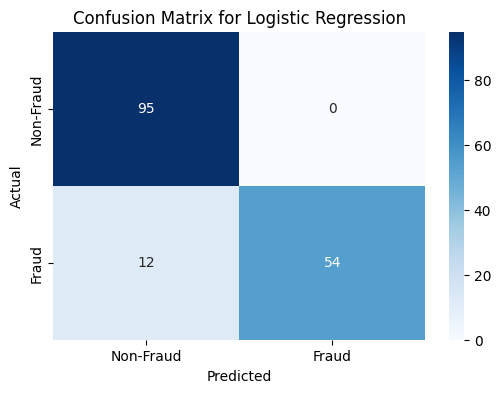

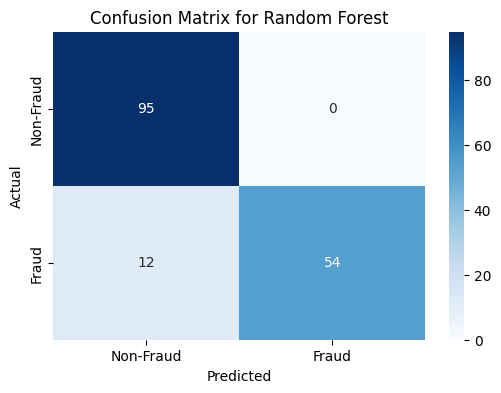

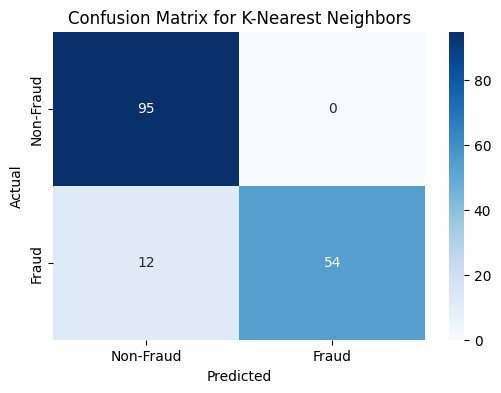

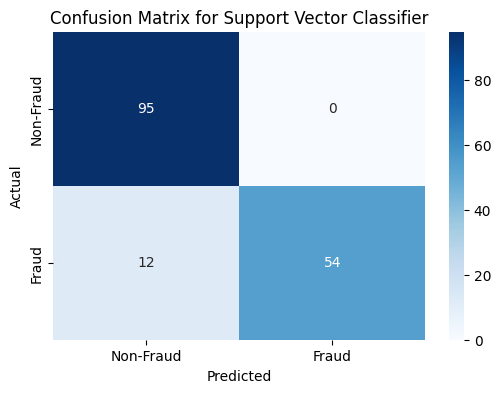

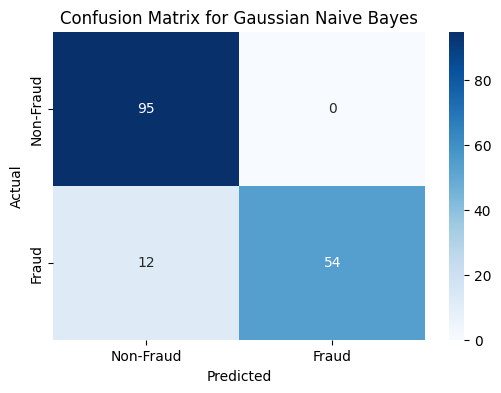

In [30]:
for name,model in models.items():
  cm= confusion_matrix(y_test,y_pred)
  plt.figure(figsize=(6, 4))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
  plt.title(f"Confusion Matrix for {name}")
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.show()
  print("\n")


# **Hyperparameter tuning**

In [34]:
 #Apply classification algorithms (Logistic Regression, SVM, Random Forest)
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg_params = {'C': [0.01, 0.1, 1, 10]}
log_reg_grid = GridSearchCV(log_reg, log_reg_params, cv=5)
log_reg_grid.fit(X_train_scaled, y_train)

# Random Forest
rf = RandomForestClassifier()
rf_params = {'n_estimators': [10,50, 100, 150], 'max_depth': [2,3, 5, 7]}
rf_grid = GridSearchCV(rf, rf_params, cv=5)
rf_grid.fit(X_train_scaled, y_train)


# SVM
svm = SVC()
svm_params = {'C': [0.1,1], 'kernel': ['linear', 'rbf']}
svm_grid = GridSearchCV(svm, svm_params, cv=5)
svm_grid.fit(X_train_scaled, y_train)

#Knn

knn=KNeighborsClassifier()
knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring='f1')
knn_grid.fit(X_train_scaled, y_train)

#Gaussian Naive Bayes
gnb = GaussianNB()
gnb_params = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]}
gnb_grid = GridSearchCV(gnb, gnb_params, cv=5, scoring='f1')
gnb_grid.fit(X_train_scaled, y_train)

# Evaluate model performance
def evaluate_model(model, X_test_scaled, y_test):
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")


In [35]:
# Evaluate Logistic Regression
print("Logistic Regression Performance:")
evaluate_model(log_reg_grid.best_estimator_, X_test_scaled, y_test)

# Evaluate Random Forest
print("Random Forest Performance:")
evaluate_model(rf_grid.best_estimator_, X_test_scaled, y_test)

# Evaluate SVM
print("SVM Performance:")
evaluate_model(svm_grid.best_estimator_, X_test_scaled, y_test)

# Evaluate k-NN
print("k-NN Performance:")
evaluate_model(knn_grid.best_estimator_, X_test_scaled, y_test)

# Evaluate Gaussian Naive Bayes
print("Gaussian Naive Bayes Performance:")
evaluate_model(gnb_grid.best_estimator_, X_test_scaled, y_test)

Logistic Regression Performance:
Accuracy: 0.9503
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        95
         1.0       1.00      0.88      0.94        66

    accuracy                           0.95       161
   macro avg       0.96      0.94      0.95       161
weighted avg       0.95      0.95      0.95       161

Random Forest Performance:
Accuracy: 0.9317
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94        95
         1.0       0.95      0.88      0.91        66

    accuracy                           0.93       161
   macro avg       0.94      0.92      0.93       161
weighted avg       0.93      0.93      0.93       161

SVM Performance:
Accuracy: 0.9441
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95        95
         1.0       0.98      0.88      0

In [36]:
#Choose the model with the highest performance metrics
best_model = max([log_reg_grid, svm_grid, rf_grid], key=lambda model: model.best_score_)
print(f"\nBest model: {best_model.best_estimator_}")



Best model: LogisticRegression(C=0.1, max_iter=1000)


In [38]:
# Save the best model using joblib
joblib.dump(best_model, 'best_fraud_detectin_model.pkl')

print("\nBest model saved as 'best_fraud_detectin_model.pkl'")


Best model saved as 'best_fraud_detectin_model.pkl'


# **Conclusion :**
  In this project, we developed and evaluated multiple machine learning models to detect fraudulent credit card transactions using a real-world dataset. The Logistic Regression achieved the highest performance with an accuracy of 95.03%. and an F1-score of 0.95, making it the most reliable model for this task. Our analysis highlighted that features like transaction amount and time play a significant role in identifying fraud. This work contributes to the ongoing efforts to fight against financial fraud, providing a scalable solution for detecting anomalies in transaction data.

# **Limitation:**
The project achieved high accuracy but faced issues with the imbalanced dataset, as there were fewer fraud cases. The models might not work well for other organizations with different fraud patterns. Real-time detection was not included, and complex models are harder to understand and use.